# We're going to compare the two binning methods for all of our galaxies.

Let's import all the necessary modules and then make a list of usable FITS file paths 

In [89]:
from new_Galaxy import SpiralGalaxy as SG1
from newer_Galaxy import SpiralGalaxy as SG2

In [90]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [91]:
plt.style.use('seaborn')
plt.style.use('seaborn-colorblind')

In [92]:
usable_paths = np.load('usable_path_list.npy')[::4]

In [93]:
len(usable_paths)

39

Let us now compare both the binning methods.

In [94]:
gal_list1 = []

for path in usable_paths:
    gal_list1.append(SG1(path))
    
    
gal_list2 = []

for path in usable_paths:
    gal_list2.append(SG2(path))

In [95]:
for gal in gal_list1:
    gal.form_global_df()
    
for gal in gal_list2:
    gal.form_global_df()

/raid5/homes/sshamsi/galaxy_zoo/GZ3D_spiral_analysis/new_Galaxy.py:134: RuntimeWarning: invalid value encountered in double_scalars
  x['SFR'] = (self.delta * (ha_flux**3.36) * (hb_flux**-2.36)) / self.spax_area


In [96]:
for gal in gal_list1:
    map_ha = gal.maps.getMap('emline_gflux', channel='ha_6564')
    map_hb = gal.maps.getMap('emline_gflux', channel='hb_4862')

    ha_snr = map_ha.snr.flatten()
    hb_snr = map_hb.snr.flatten()

    gal.df['S/N $H_{\\alpha}$'] = ha_snr
    gal.df['S/N $H_{\\beta}$'] = hb_snr

In [97]:
for gal in gal_list2:
    map_ha = gal.maps.getMap('emline_gflux', channel='ha_6564')
    map_hb = gal.maps.getMap('emline_gflux', channel='hb_4862')

    ha_snr = map_ha.snr.flatten()
    hb_snr = map_hb.snr.flatten()

    gal.df['S/N $H_{\\alpha}$'] = ha_snr
    gal.df['S/N $H_{\\beta}$'] = hb_snr

In [98]:
tot_sfr1 = []
tot_sfr_stdv1 = []

tot_sfr_spiral1 = []
tot_sfr_stdv_spiral1 = []

tot_sfr_nspiral1 = []
tot_sfr_stdv_nspiral1 = []

for gal in gal_list1:
    df = gal.df
    
    df = df.dropna()
    df = df[(df['$r/r_e$'] <= 1) & (df['$r/r_e$'] >= 0.1)]
    df = df[(df.Comp == 0) & (df.AGN == 0) & (df.Seyfert == 0) & (df.Liner == 0)]
    df = df[(df['S/N $H_{\\alpha}$'] >= 3) & (df['S/N $H_{\\beta}$'] >= 3)]
    
    df_spiral = df[df['Spiral Arm'] == 1]
    df_nspiral = df[df['Spiral Arm'] == 0]
    
    sfr = df.SFR.sum()
    sfr_stdv = np.sqrt(gal.get_var(df.index, mode='sfr', avg=False))
    
    sfr_spiral = df_spiral.SFR.sum()
    sfr_stdv_spiral = np.sqrt(gal.get_var(df_spiral.index, mode='sfr', avg=False))
    
    sfr_nspiral = df_nspiral.SFR.sum()
    sfr_stdv_nspiral = np.sqrt(gal.get_var(df_nspiral.index, mode='sfr', avg=False))
    
    tot_sfr1.append(sfr)
    tot_sfr_stdv1.append(sfr_stdv)
    
    tot_sfr_spiral1.append(sfr_spiral)
    tot_sfr_stdv_spiral1.append(sfr_stdv_spiral)

    tot_sfr_nspiral1.append(sfr_nspiral)
    tot_sfr_stdv_nspiral1.append(sfr_stdv_nspiral)

In [99]:
tot_sfr2 = []
tot_sfr_stdv2 = []

tot_sfr_spiral2 = []
tot_sfr_stdv_spiral2 = []

tot_sfr_nspiral2 = []
tot_sfr_stdv_nspiral2 = []

for gal in gal_list2:
    df = gal.df
    
    df = df.dropna()
    df = df[(df['$r/r_e$'] <= 1) & (df['$r/r_e$'] >= 0.1)]
    df = df[(df.Comp == 0) & (df.AGN == 0) & (df.Seyfert == 0) & (df.Liner == 0)]
    df = df[(df['S/N $H_{\\alpha}$'] >= 3) & (df['S/N $H_{\\beta}$'] >= 3)]
    
    df_spiral = df[df['Spiral Arm'] == 1]
    df_nspiral = df[df['Spiral Arm'] == 0]
    
    sfr, sfr_stdv = gal.get_sfr(df.index, avg=False)
    sfr_spiral, sfr_stdv_spiral = gal.get_sfr(df_spiral.index, avg=False)
    sfr_nspiral, sfr_stdv_nspiral = gal.get_sfr(df_nspiral.index, avg=False)
    
    tot_sfr2.append(sfr)
    tot_sfr_stdv2.append(sfr_stdv)
    
    tot_sfr_spiral2.append(sfr_spiral)
    tot_sfr_stdv_spiral2.append(sfr_stdv_spiral)

    tot_sfr_nspiral2.append(sfr_nspiral)
    tot_sfr_stdv_nspiral2.append(sfr_stdv_nspiral)

/raid5/homes/sshamsi/galaxy_zoo/GZ3D_spiral_analysis/newer_Galaxy.py:134: RuntimeWarning: invalid value encountered in double_scalars
  sfr = (self.delta * (ha_flux**3.36) * (hb_flux**-2.36)) / self.spax_area


In [100]:
x_array = np.arange(len(usable_paths))

In [101]:
diff_sfr = np.subtract(tot_sfr1, tot_sfr2)
diff_sfr_spiral = np.subtract(tot_sfr_spiral1, tot_sfr_spiral2)
diff_sfr_nspiral = np.subtract(tot_sfr_nspiral1, tot_sfr_nspiral2)

In [102]:
diff_sfr_stdv = np.subtract(tot_sfr_stdv1, tot_sfr_stdv2)
diff_sfr_stdv_spiral = np.subtract(tot_sfr_stdv_spiral1, tot_sfr_stdv_spiral2)
diff_sfr_stdv_nspiral = np.subtract(tot_sfr_stdv_nspiral1, tot_sfr_stdv_nspiral2)

In [103]:
def err_touples(errs):
    loerrs = []
    hierrs = []
    
    for err in errs:
        if err < 0:
            loerrs.append(abs(err))
            hierrs.append(0)
        else:
            loerrs.append(0)
            hierrs.append(abs(err))
            
    loerrs = tuple(loerrs)
    hierrs = tuple(hierrs)
    
    return [loerrs, hierrs]

In [104]:
diff_sfr_stdvt = err_touples(diff_sfr_stdv)
diff_sfr_stdv_spiralt = err_touples(diff_sfr_stdv_spiral)
diff_sfr_stdv_nspiralt = err_touples(diff_sfr_stdv_nspiral)

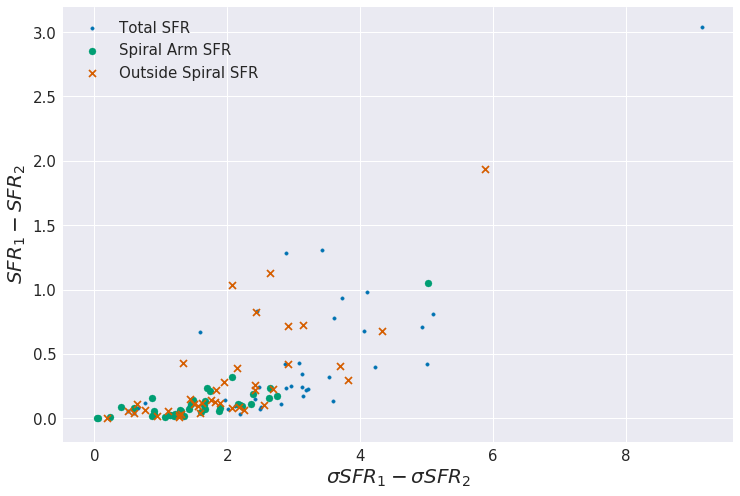

In [105]:
plt.figure(figsize=(12,8))

plt.scatter(diff_sfr_stdv, diff_sfr, marker='.', label='Total SFR')
plt.scatter(diff_sfr_stdv_spiral, diff_sfr_spiral, marker='o', label='Spiral Arm SFR')
plt.scatter(diff_sfr_stdv_nspiral, diff_sfr_nspiral, marker='x', label='Outside Spiral SFR')

plt.xlabel(r'$\sigma SFR_1 - \sigma SFR_2$', size=20)
plt.ylabel(r'$SFR_1 - SFR_2$', size=20)

plt.xticks(size=15)
plt.yticks(size=15)

plt.legend(fontsize=15)

In [69]:
np.arange(0, 60, 3)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57])

In [70]:
np.arange(1, 61, 3)

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49,
       52, 55, 58])

In [29]:
l1 = [1,2,3,4]
l2 = [-1, 6, 7, 0]

In [30]:
np.subtract(l1, l2)

array([ 2, -4, -4,  4])

In [33]:
fo0 = (1, 2, 5, 6, 7, -9)

In [35]:
type(fo0)

tuple

In [121]:
avg_s2n = []

for gal in gal_list1:
    df = gal.df.dropna()
    df = df[(df['$r/r_e$'] <= 1) & (df['$r/r_e$'] >= 0.1)]
    df = df[(df.Comp == 0) & (df.AGN == 0) & (df.Seyfert == 0) & (df.Liner == 0)]
    df = df[(df['S/N $H_{\\alpha}$'] >= 3) & (df['S/N $H_{\\beta}$'] >= 3)]
    
    s2n = df['S/N $H_{\\alpha}$'].mean()
    avg_s2n.append(s2n)

In [122]:
avg_s2n = np.array(avg_s2n)

In [123]:
np.argsort(diff_sfr_stdv)

array([33, 28, 34, 13, 22, 31, 27, 23, 16, 14,  6,  4, 11, 21, 20, 30,  5,
       35, 29, 32,  0, 26,  9, 17, 37, 25, 10,  3, 36,  8, 19, 18, 12, 15,
       38, 24,  2,  7,  1])

In [124]:
avg_s2n_sorted = avg_s2n[np.argsort(diff_sfr_stdv)]

In [125]:
avg_s2n_sorted

array([ 12.249993,  65.06142 ,  29.938967,  15.953802, 207.2972  ,
       424.01974 , 150.64845 , 147.82632 ,  95.68584 ,  72.07729 ,
        58.94358 , 211.30635 ,  53.4173  ,  92.86558 , 104.56988 ,
       123.6296  , 101.205956,  63.01643 ,  47.862503,  89.83793 ,
        37.200314,  22.872442,  67.203156,  93.99104 ,  86.77586 ,
        42.843445,  74.208755,  76.93641 ,  26.596018, 115.7586  ,
        79.52919 ,  76.164986,  45.17286 ,  34.21058 ,  28.138796,
        28.850674,  40.87394 ,  49.01407 ,  57.442898], dtype=float32)

Text(0, 0.5, 'S/N $H_{\\alpha}$')

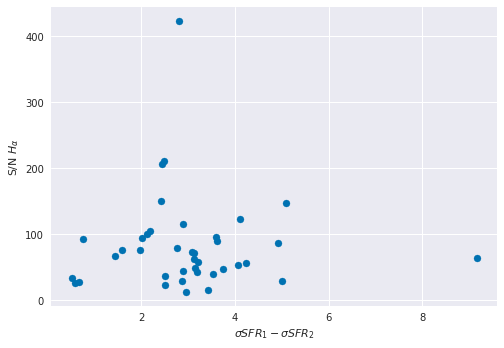

In [129]:
plt.scatter(diff_sfr_stdv, avg_s2n_sorted)
plt.xlabel('$\sigma SFR_1 - \sigma SFR_2$')
plt.ylabel('S/N $H_{\\alpha}$')